In [ ]:
class SimpleFuzzyLogic:
    @staticmethod
    def temperature_classifier(temp):
        if temp <= 10:
            return "Cold"
        elif 10 < temp <= 20:
            cold_degree = (20 - temp) / 10
            mild_degree = (temp - 10) / 10
            return f"Cold ({cold_degree:.2f}) and Mild ({mild_degree:.2f})"
        elif 20 < temp <= 30:
            return "Mild"
        elif 30 < temp <= 40:
            mild_degree = (40 - temp) / 10
            hot_degree = (temp - 30) / 10
            return f"Mild ({mild_degree:.2f}) and Hot ({hot_degree:.2f})"
        else:
            return "Hot"

def main():
    test_temperatures = [5, 15, 25, 35, 45]
    
    print("Fuzzy Temperature Classification:")
    for temp in test_temperatures:
        classification = SimpleFuzzyLogic.temperature_classifier(temp)
        print(f"{temp}°C: {classification}")

if __name__ == "__main__":
    main()

For temperature 30°C, recommended fan speed: 64.11


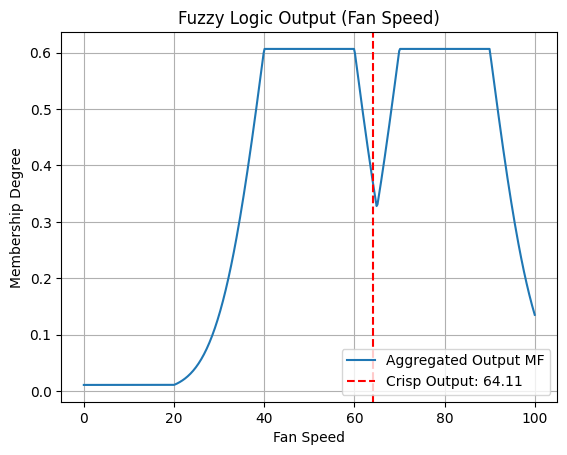

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_membership(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma) ** 2)

def temp_cold(x): return gaussian_membership(x, mean=15, sigma=5)
def temp_comfort(x): return gaussian_membership(x, mean=25, sigma=5)
def temp_hot(x): return gaussian_membership(x, mean=35, sigma=5)

def speed_low(x): return gaussian_membership(x, mean=20, sigma=10)
def speed_medium(x): return gaussian_membership(x, mean=50, sigma=10)
def speed_high(x): return gaussian_membership(x, mean=80, sigma=10)

def fuzzy_fan_speed(temperature):
    mu_cold = temp_cold(temperature)
    mu_comfort = temp_comfort(temperature)
    mu_hot = temp_hot(temperature)
    
    rule1 = mu_cold    # IF temp is cold THEN speed is low
    rule2 = mu_comfort # IF temp is comfort THEN speed is medium
    rule3 = mu_hot     # IF temp is hot THEN speed is high
    
    x = np.linspace(0, 100, 500)
    output = (
        np.fmax.reduce([
            np.fmin(rule1, speed_low(x)),
            np.fmin(rule2, speed_medium(x)),
            np.fmin(rule3, speed_high(x))
        ])
    )
    crisp = np.sum(x*output) / np.sum(output)
    return  crisp,x, output

temperature = 30
fan_speed, x_vals, output_mf = fuzzy_fan_speed(temperature)
print(f"For temperature {temperature}°C, recommended fan speed: {fan_speed:.2f}")

plt.plot(x_vals, output_mf, label="Aggregated Output MF")
plt.axvline(fan_speed, color='r', linestyle='--', label=f"Crisp Output: {fan_speed:.2f}")
plt.title("Fuzzy Logic Output (Fan Speed)")
plt.xlabel("Fan Speed")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()